## FAKE NEWS DETECTION PROJECT @ CODXO https://github.com/Srienzo/CODXO_Sherwin

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  daniel greenfield a shillman journalism fellow...  FAKE  
1  google pinterest digg linkedin reddit stumbleu...  FAKE  
2  u s secretary of state john f kerry said monda...  REAL  
3  kaydee king kaydeeking november the lesson fro...  FAKE  
4  it s primary day in new york and front runners...  REAL  
Best parameters: {'pac__C': 0.1, 'tfidf__max_df': 1.0, 'tfidf__ngram_range': (1, 1)}
Accuracy: 93.45%
Confusion Matrix:
[[589  39]
 [ 44 595]]


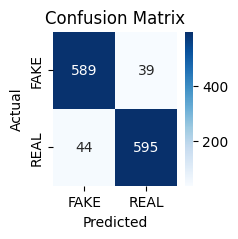

Classification Report:
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Model saved as news_classifier_model.pkl



Do you want to classify a piece of news? (yes/no):  yes



Sample news from the dataset:
1. You Can Smell Hillary’s Fear
2. Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)
3. Kerry to go to Paris in gesture of sympathy
4. Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'
5. The Battle of New York: Why This Primary Matters
6. Tehran, USA
7. Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On
8. ‘Britain’s Schindler’ Dies at 106
9. Fact check: Trump and Clinton at the 'commander-in-chief' forum
10. Iran reportedly makes new push for uranium concessions in nuclear talks


Enter the number corresponding to the news you want to classify (1-10):  5



The news is classified as: REAL



Do you want to classify a piece of news? (yes/no):  yes



Sample news from the dataset:
1. You Can Smell Hillary’s Fear
2. Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)
3. Kerry to go to Paris in gesture of sympathy
4. Bernie supporters on Twitter erupt in anger against the DNC: 'We tried to warn you!'
5. The Battle of New York: Why This Primary Matters
6. Tehran, USA
7. Girl Horrified At What She Watches Boyfriend Do After He Left FaceTime On
8. ‘Britain’s Schindler’ Dies at 106
9. Fact check: Trump and Clinton at the 'commander-in-chief' forum
10. Iran reportedly makes new push for uranium concessions in nuclear talks


Enter the number corresponding to the news you want to classify (1-10):  6



The news is classified as: FAKE



Do you want to classify a piece of news? (yes/no):  no


Exiting the classification loop.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import joblib
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Function to clean the text data
def clean_text(text):
    return " ".join(re.sub("[^a-zA-Z]", " ", text).lower().split())

# Load and clean the dataset
df = pd.read_csv('news.csv')
df['text'] = df['text'].apply(clean_text)
print(df.head())

# Split the data
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('pac', PassiveAggressiveClassifier(max_iter=50))
])

# Reduce the size of the dataset for GridSearchCV
x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train, test_size=0.9, random_state=42)

# Set up GridSearchCV
param_grid = {
    'tfidf__max_df': [0.7, 1.0],
    'tfidf__ngram_range': [(1, 1)],
    'pac__C': [0.1, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_small, y_train_small)
print(f'Best parameters: {grid_search.best_params_}')

# Train and evaluate the best model
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%')

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
print('Confusion Matrix:')
print(confusion)

# Plot Confusion Matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

# Save the model
joblib.dump(best_model, 'news_classifier_model.pkl')
print('Model saved as news_classifier_model.pkl')

# Predict function
def predict_news(text):
    return best_model.predict([clean_text(text)])[0]

# Load sample news for user input testing
def get_sample_news(df):
    print("\nSample news from the dataset:")
    for i in range(10):
        print(f"{i + 1}. {df['title'].iloc[i]}")
    index = int(input("Enter the number corresponding to the news you want to classify (1-10): ")) - 1
    return df['text'].iloc[index]

# User input loop
while True:
    choice = input("\nDo you want to classify a piece of news? (yes/no): ").strip().lower()
    if choice == 'yes':
        news_text = get_sample_news(df)
        print(f"\nThe news is classified as: {predict_news(news_text)}")
    elif choice == 'no':
        print("Exiting the classification loop.")
        break
    else:
        print("Invalid input. Please enter 'yes' or 'no'.")
